<a href="https://colab.research.google.com/github/1kaiser/test2023/blob/main/shallow_water_equations_with_elevation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

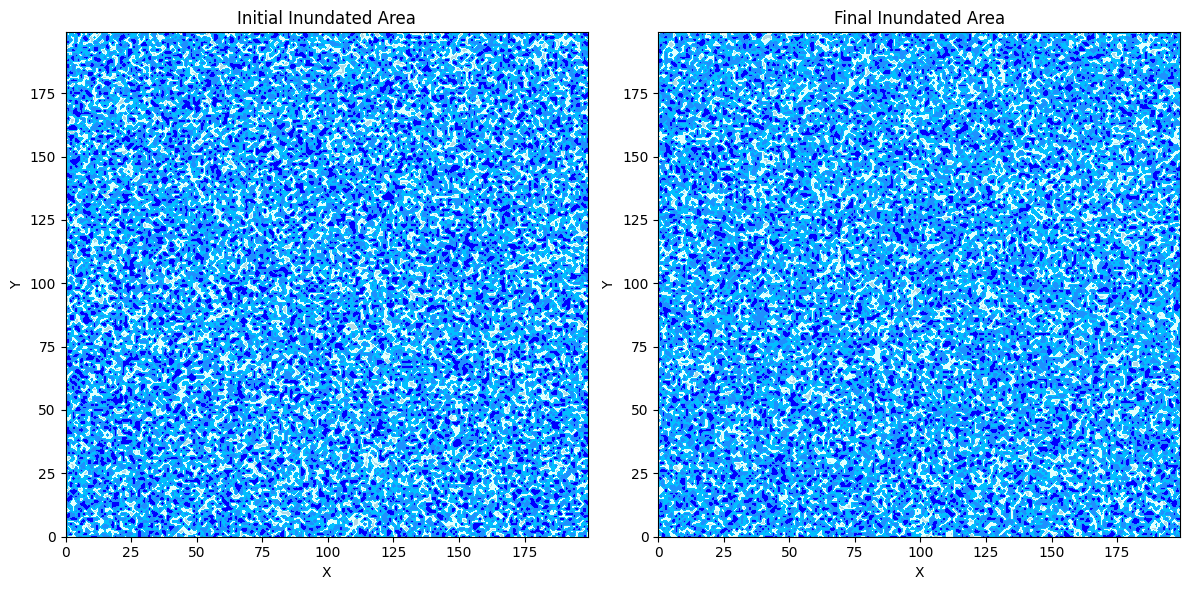

In [ ]:
import jax
import jax.numpy as jnp
import jax.random as jrandom
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define the shallow water equations with elevation
def shallow_water_equations(h, u, g, dx, dt, dem):
    def dh_dt(h, u):
        return -u * h

    def du_dt(h, u):
        return -u**2 / h - 0.5 * g * h**2 - g * h * (1 - dem)

    new_h = h + jax.grad(lambda h: jnp.sum(dh_dt(h, u)))(h) * dt
    new_u = u + jax.grad(lambda u: jnp.sum(du_dt(h, u)))(u) * dt

    return new_h, new_u

# Simulation parameters
g = 9.81  # Acceleration due to gravity
dx = 0.1  # Spatial step
dt = 0.01  # Time step

# DEM (Digital Elevation Model) values
dem_values = jrandom.uniform(jrandom.PRNGKey(0), (200, 200), minval=0.0, maxval=1.0)  # Generate a random DEM

# Initial conditions
initial_h = jrandom.uniform(jrandom.PRNGKey(1), (200, 200), minval=0.1, maxval=20)
initial_u = jnp.zeros_like(initial_h)

# Perform the simulation
num_steps = 1000
h_values = [initial_h]

for _ in range(num_steps):
    new_h, _ = shallow_water_equations(h_values[-1], initial_u, g, dx, dt, dem_values)
    h_values.append(new_h)

# Final inundated area
final_h = h_values[-1]

# Create meshgrid for plotting
x = jnp.arange(dem_values.shape[1])
y = jnp.arange(dem_values.shape[0])

X, Y = jnp.meshgrid(x, y)

# Plot initial and final inundated areas
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
cmap = ListedColormap(['lightblue', 'lightcyan', 'deepskyblue', 'dodgerblue', 'blue'])

# Plot initial inundated area
axs[0].contourf(X, Y, dem_values , levels=200, cmap=cmap)
axs[0].set_title('Initial Inundated Area')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')

# Plot final inundated area
axs[1].contourf(X, Y, dem_values + final_h, levels=200, cmap=cmap)
axs[1].set_title('Final Inundated Area')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')

plt.tight_layout()
plt.show()
